<a href="https://colab.research.google.com/github/sandipanpaul21/Data_Science_INSHORT/blob/main/EDA_03_Outliers_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Missing Value and Outlier Detection IN SHORT**

"To ensure that the trained model generalises and stabilises well to the valid range of test inputs, it's important to detect then handle missing values and outliers well."

**Outliers**
- Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution.
- For example in a dataset of Fixed Deposit Investment, if I find a few investments  priced above Rs 1 Crore much higher than the median investment (for now consider Rs 5 Lacs per FD), they're likely outliers. 

**Should we remove outliers?**
- No, it will lead to data loss. Natural variation can also produce outliers and it's not necessarily a problem. An FD of Rs. 1 Crore is possible in the above example. So why remove it, if we can handle those extreme data points in some other way (the hint is to use the capping method) 

**Few Outlier Detection Techniques**
1. Standard Deviation 
2. Z Score
3. Inter Quartile Range (IQR) / Box Plot
4. Percentile

In [1]:
# As a first step, we’ll import the necessary modules.
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Create a sample dataset of Fixed Deposit Investment
data = [['Sandipan', 28, 15000, 'Male'],['Ashish', 31, 10000, 'Male'],['Vaibhav', 27, 12000, 'Male'],
        ['Sukanya', 26, 400000, 'Female'],['Sambit', 28, 20000, 'Male'],['Sandipan', 28, 15000, 'Male'],
        ['Ashish', 31, 10000, 'Male'],['Vaibhav', 27, 12000, 'Male'],['Sambit', 28, 20000, 'Male'],
        ['Ashish', 31, 10000, 'Male'],['Vaibhav', 27, 12000, 'Male'],['Sambit', 28, 20000, 'Male']]
# Create the Pandas DataFrame
fd_customer_data = pd.DataFrame(data, columns=['Name', 'Age','Amount','Gender'])
fd_customer_data.head()

,Name,Age,Amount,Gender
0,Sandipan,28,15000,Male
1,Ashish,31,10000,Male
2,Vaibhav,27,12000,Male
3,Sukanya,26,400000,Female
4,Sambit,28,20000,Male


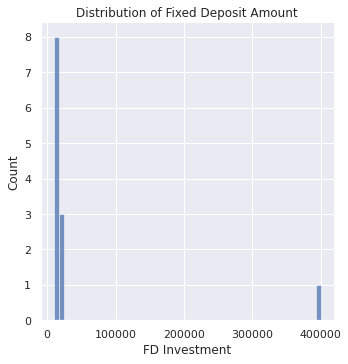

In [2]:
sns.set_theme()
sns.displot(data=fd_customer_data['Amount']).set(title="Distribution of Fixed Deposit Amount", xlabel="FD Investment")

**Outlier Detection Using Standard Deviation**
- For this outlier detection method, the mean and standard deviation of the residuals are calculated and compared. If a value is a certain number of standard deviations away from the mean, that data point is identified as an outlier. 
- The specified number of standard deviations is called the threshold. The default value is 3.

**NOTE** 

This method can fail to detect outliers because the outliers increase the standard deviation. The more extreme the outlier, the more the standard deviation is affected.

In [3]:
# Outlier Detection Using Standard Deviation
# To obtain the mean and standard deviation, we can use the .mean() and the .std() methods, respectively.
print('Mean of Dataset(FD Amount) : ',fd_customer_data['Amount'].mean().round(2))
print('Standard Deviation of Dataset(FD Amount) : ',fd_customer_data['Amount'].std().round(2))

# Set the limit of Standard Deviation
# lower limit (lower_limit) to be three standard deviations below the mean
# the upper limit (upper_limit) to be three standard deviations above the mean.
lower_limit = fd_customer_data['Amount'].mean() - 3*fd_customer_data['Amount'].std()
upper_limit = fd_customer_data['Amount'].mean() + 3*fd_customer_data['Amount'].std()
print('Lower Limit in terms of Standard Deviation : ',lower_limit.round(2))
print('Upper Limit in terms of Standard Deviation : ',upper_limit.round(2))

# Filter the dataframe df_scores to only retain the data points in the interval [lower_limit, upper_limit]
fd_filtered=fd_customer_data[(fd_customer_data['Amount']>lower_limit)&(fd_customer_data['Amount']<upper_limit)]
print("\nNon Outlier Data :\n",fd_filtered.head())

outlier_data =fd_customer_data[(fd_customer_data['Amount']<lower_limit)|(fd_customer_data['Amount']>upper_limit)]
print("\nOutlier Data :\n",outlier_data.head()) # Inference as we can observe, Sukanya made an Outlier Investment

Mean of Dataset(FD Amount) :  46333.33
Standard Deviation of Dataset(FD Amount) :  111445.33
Lower Limit in terms of Standard Deviation :  -288002.64
Upper Limit in terms of Standard Deviation :  380669.31

Non Outlier Data :
        Name  Age  Amount Gender
0  Sandipan   28   15000   Male
1    Ashish   31   10000   Male
2   Vaibhav   27   12000   Male
4    Sambit   28   20000   Male
5  Sandipan   28   15000   Male

Outlier Data :
       Name  Age  Amount  Gender
3  Sukanya   26  400000  Female


**Detect Outliers Using the Z-Score**

- For a normal distribution with mean μ and standard deviation σ, the z-score for a value x in the dataset is given by: z = (x - μ)/σ
- From the above equation, we have the following:
  - When x = μ, the value of the z-score is 0.
  - When x = μ ± 1, μ ± 2, or μ ± 3, the z-score is ± 1, ± 2, or ± 3, respectively.

**Notice** how this technique is equivalent to the scores based on the standard deviation above. 

- Under this transformation, all data points that lie below the lower limit, μ - 3*σ, now map to points that are less than -3 on the z-score scale. 
- Similarly, all points that lie above the upper limit, μ + 3*σ map to a value above 3 on the z-score scale. So lower_limit, upper_limit becomes -3,3

In [4]:
# Detect Outliers Using the Z-Score
fd_customer_data['z_score'] =(fd_customer_data['Amount'] - fd_customer_data['Amount'].mean())/fd_customer_data['Amount'].std()

fd_customer_data_filtered = fd_customer_data[(fd_customer_data['z_score']>-3) & (fd_customer_data['z_score']<3)]
print("Non Outlier Data :\n",fd_customer_data_filtered.head())

outlier_data = fd_customer_data[(fd_customer_data['z_score']<-3) | (fd_customer_data['z_score']>3)]
print("\nOutlier Data :\n",outlier_data.head()) # Inference as we can observe, Sukanya made an Outlier Investment

Non Outlier Data :
        Name  Age  Amount Gender   z_score
0  Sandipan   28   15000   Male -0.281154
1    Ashish   31   10000   Male -0.326019
2   Vaibhav   27   12000   Male -0.308073
4    Sambit   28   20000   Male -0.236289
5  Sandipan   28   15000   Male -0.281154

Outlier Data :
       Name  Age  Amount  Gender   z_score
3  Sukanya   26  400000  Female  3.173454


[Text(0.5, 1.0, 'Box Plot of FD Investment')]

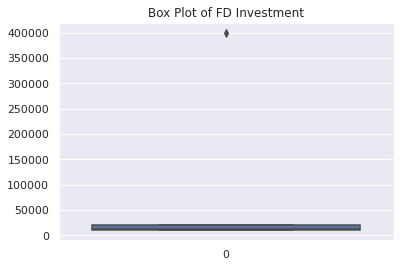

In [5]:
# Outlier Detection Using Interquartile Range (IQR)
sns.boxplot(data=fd_customer_data['Amount']).set(title="Box Plot of FD Investment")

In [6]:
print("Different attributes of FD Investment Dataset")
print(fd_customer_data['Amount'].describe().round(2))
# We use the 25% and 75% quartile values from the above result to compute IQR, subsequently set the lower and upper limits to filter
IQR = 20000.00 - 11500.00
lower_limit = 54 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print("Upper Limit of FD Investment : ",upper_limit)
print("Lower Limit of FD Investment : ",lower_limit)
fd_filtered = fd_customer_data[(fd_customer_data['Amount']>lower_limit) & (fd_customer_data['Amount']<upper_limit)]
print("Non Outlier Data :\n",fd_filtered.head())
outlier_data = fd_customer_data[(fd_customer_data['Amount']<lower_limit) | (fd_customer_data['Amount']>upper_limit)]
print("Outlier Data :\n",outlier_data.head())

Different attributes of FD Investment Dataset
count        12.00
mean      46333.33
std      111445.33
min       10000.00
25%       11500.00
50%       13500.00
75%       20000.00
max      400000.00
Name: Amount, dtype: float64
Upper Limit of FD Investment :  12817.0
Lower Limit of FD Investment :  -12696.0
Non Outlier Data :
       Name  Age  Amount Gender   z_score
1   Ashish   31   10000   Male -0.326019
2  Vaibhav   27   12000   Male -0.308073
6   Ashish   31   10000   Male -0.326019
7  Vaibhav   27   12000   Male -0.308073
9   Ashish   31   10000   Male -0.326019
Outlier Data :
        Name  Age  Amount  Gender   z_score
0  Sandipan   28   15000    Male -0.281154
3   Sukanya   26  400000  Female  3.173454
4    Sambit   28   20000    Male -0.236289
5  Sandipan   28   15000    Male -0.281154
8    Sambit   28   20000    Male -0.236289


**Outliers Using Percentile**
- The interquartile range works by dropping all points that are outside the range q25 - 1.5*(IQR), q75 + 1.5*(IQR) as outliers. 
- But removing outliers this way may not be the most optimal choice when your observations have a wide distribution. And you may be discarding more points-than you actually should-as outliers.
- Depending on the domain, you may want to widen the range of permissible values to estimate the outliers better using percentile. For example, the custom range accommodates all data points that lie anywhere between 0.5 and 99.5 percentile of the dataset.

In [7]:
# Outlier Detection Using Percentile
lower_limit, upper_limit = np.percentile(a=fd_customer_data['Amount'],q=[0.5,99.5])
print("Upper Limit of FD Investment : ",upper_limit.round(2))
print("Lower Limit of FD Investment : ",lower_limit)

fd_filtered = fd_customer_data[(fd_customer_data['Amount']>lower_limit) & (fd_customer_data['Amount']<upper_limit)]
print("Non Outlier Data :\n",fd_filtered.head())

outlier_data = fd_customer_data[(fd_customer_data['Amount']<lower_limit) | (fd_customer_data['Amount']>upper_limit)]
print("Outlier Data :\n",outlier_data.head())

Upper Limit of FD Investment :  379100.0
Lower Limit of FD Investment :  10000.0
Non Outlier Data :
        Name  Age  Amount Gender   z_score
0  Sandipan   28   15000   Male -0.281154
2   Vaibhav   27   12000   Male -0.308073
4    Sambit   28   20000   Male -0.236289
5  Sandipan   28   15000   Male -0.281154
7   Vaibhav   27   12000   Male -0.308073
Outlier Data :
       Name  Age  Amount  Gender   z_score
3  Sukanya   26  400000  Female  3.173454


**Missing Values**
- The absence of values is a cause of concern for datasets and in the Machine Learning model

**Methods to impute Missing Values**: Mean, Median, Mode and KNN Imputation

**Impute with**
1. Mean / Median Value  - For Continuous Data
2. Mode Value - For Categorical Data

**KNN Imputation**
- Each sample's missing values are imputed using the mean value from n_neighbors nearest neighbours found in the training set. Two samples are close if the features that neither is missing are close. By default, a euclidean distance metric supports missing values. nan_euclidean_distances is used to find the nearest neighbours
- For imputing missing values in CATEGORICAL VALUES, we have to encode the categorical values into numeric values. kNNImputer works only for numeric variables. We can perform this using a mapping of categories to numeric variables.

In [8]:
# KNN Imputation, First create a small dataframe with missing values in it
# import the KNNimputer class
from sklearn.impute import KNNImputer
dict = {'First':[100, 90, np.nan, 95], 
        'Second': [30, 45, 56, np.nan], 
        'Third':[np.nan, 40, 80, 98]} 
df = pd.DataFrame(dict)
df

,First,Second,Third
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [9]:
# Intializing KNN imputation
imputer = KNNImputer()
df_filled = imputer.fit_transform(df)
df_filled

# Inference :
# As you can see below, that’s the entire missing value is imputated
# It’s as simple using median but more effective and accurate than using a simple average

array([[100.        ,  30.        ,  72.66666667],
       [ 90.        ,  45.        ,  40.        ],
       [ 95.        ,  56.        ,  80.        ],
       [ 95.        ,  43.66666667,  98.        ]])

In [10]:
# Another Example of KNN Imputation
# Initializing the list
data = [['Sandipan',27,'male'],['Nandita',26,'female'],['Santosh',25,'male'],
        ['Ashish',29,'male'],['Nishu',26,None],['Aisha',27,None],['Vaibhav',28,None]]
df = pd.DataFrame(data, columns = ['Name','Age','Gender'])
df

,Name,Age,Gender
0,Sandipan,27,male
1,Nandita,26,female
2,Santosh,25,male
3,Ashish,29,male
4,Nishu,26,None
5,Aisha,27,None
6,Vaibhav,28,None


In [11]:
# For imputing missing values in categorical variables
# We have to encode the categorical values into numeric values,kNNImputer works only for numeric variables
# We can perform this using a mapping of categories to numeric variables,Mapping Gender values to 0 and 1
df['GenderMap'] = df.Gender.map({'female' : 1, 'male' : 0})
df

,Name,Age,Gender,GenderMap
0,Sandipan,27,male,0.0
1,Nandita,26,female,1.0
2,Santosh,25,male,0.0
3,Ashish,29,male,0.0
4,Nishu,26,None,NaN
5,Aisha,27,None,NaN
6,Vaibhav,28,None,NaN


In [12]:
# Normally Name of a person don't help in the model
imputer = KNNImputer(n_neighbors=1) 
# k=1, we can take any number and check after every irritation
df_filled = imputer.fit_transform(df[['Age','GenderMap']])
df_filled 

array([[27.,  0.],
       [26.,  1.],
       [25.,  0.],
       [29.,  0.],
       [26.,  1.],
       [27.,  0.],
       [28.,  0.]])